**1) Load the dataset and map the target variable**

In [2]:
import pandas as pd

fake = pd.read_csv("C:\\Users\\Mukesh\\Desktop\\Fake News Detection\\Fake_News\\Fake.csv", engine ='python', error_bad_lines=False)

true = pd.read_csv("C:\\Users\\Mukesh\\Desktop\\Fake News Detection\\Fake_News\\True.csv")


Skipping line 22852: unexpected end of data


In [3]:
fake['target'] = 'fake'
true['target'] = 'true'

In [4]:
data = pd.concat([fake, true]).reset_index(drop = True)

In [5]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [6]:
data.drop(["date"],axis=1,inplace=True)

In [7]:
data.drop(["title"],axis=1,inplace=True)

In [8]:
data['text'] = data['text'].apply(lambda x: x.lower())

**2) Functions to remove punctuations and stop words**

In [9]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
    
data['text'] = data['text'].apply(punctuation_removal)

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mukesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


**3) Plots for data analysis**

Matplotlib is building the font cache; this may take a moment.


subject
Government News     1570
Middle-east          147
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


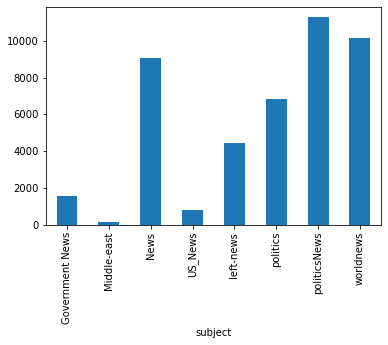

In [11]:
import matplotlib.pyplot as plt
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    22850
true    21417
Name: text, dtype: int64


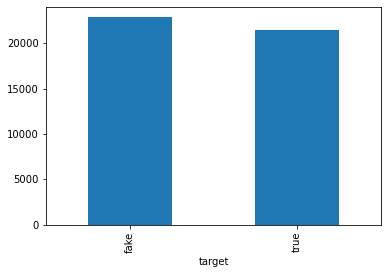

In [12]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [13]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

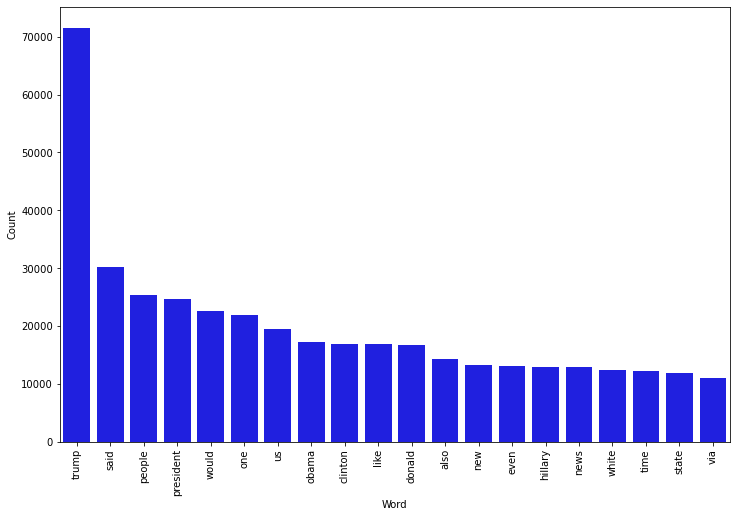

In [14]:
import seaborn as sns
counter(data[data['target'] == 'fake'], 'text', 20)

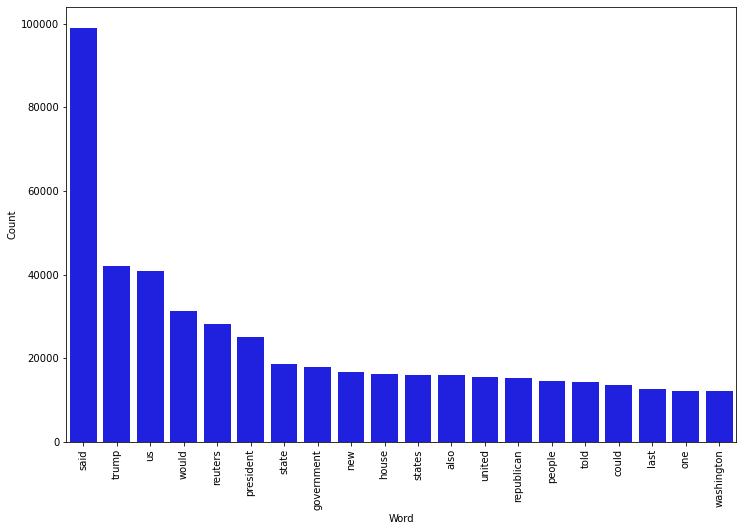

In [15]:
counter(data[data['target'] == 'true'], 'text', 20)

**4) Function to plot confusion matrix**

In [16]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

**5) Train test split the dataset**

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

**6) Model Training and Validation**

In [18]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
 
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.86%


In [19]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('vect_tree', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model1', DecisionTreeClassifier())])
# Fitting the model
model1 = pipe.fit(X_train, y_train)
# Accuracy
prediction = model1.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 99.71%


In [20]:
from sklearn.naive_bayes import BernoulliNB

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model2', BernoulliNB())])
# Fitting the model
model2 = pipe.fit(X_train, y_train)
# Accuracy
prediction = model2.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 97.92%


In [21]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model3', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
# Fitting the model
model3 = pipe.fit(X_train, y_train)
# Accuracy
prediction = model3.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
#out of bag

accuracy: 98.81%


In [31]:
from sklearn.neural_network import MLPClassifier

pipe = Pipeline([('ve0ct', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model4', MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15), random_state=10) )])
# Fitting the model
model4 = pipe.fit(X_train, y_train)
# Accuracy
prediction = model4.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 99.37%


**7) Save the Model as Pickle and Make Prediction**

In [32]:
import pickle
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

model_ml = DecisionTreeClassifier().fit(X_train_tfidf, y_train)

# Save the vectorizer
vec_file = 'vectorizer_ml.pickle'
pickle.dump(count_vect, open(vec_file, 'wb'))

# Save the model
mod_file = 'classification_ml.model'
pickle.dump(model_ml, open(mod_file, 'wb'))

In [33]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

model_dl = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15), random_state=10).fit(X_train_tfidf, y_train)

# Save the vectorizer
vec_file = 'vectorizer_dl.pickle'
pickle.dump(count_vect, open(vec_file, 'wb'))

# Save the model
mod_file = 'classification_dl.model'
pickle.dump(model_dl, open(mod_file, 'wb'))

In [10]:
import pickle
utt = 'India plans on going to war with USA'
# load the vectorizer
loaded_vectorizer = pickle.load(open('vectorizer_ml.pickle', 'rb'))

# load the model
loaded_model = pickle.load(open('classification_ml.model', 'rb'))

# make a prediction
ml_pred = loaded_model.predict(loaded_vectorizer.transform([utt]))
print(loaded_model.predict(loaded_vectorizer.transform([utt])))

['fake']


In [11]:
utt = 'India plans on going to war with USA'
# load the vectorizer
loaded_vectorizer = pickle.load(open('vectorizer_dl.pickle', 'rb'))

# load the model
loaded_model = pickle.load(open('classification_dl.model', 'rb'))

# make a prediction
dl_pred = loaded_model.predict(loaded_vectorizer.transform([utt]))
print(loaded_model.predict(loaded_vectorizer.transform([utt])))

['fake']


In [1]:
import requests
import bs4

# Make two strings with default google search URL
# 'https://google.com/search?q=' and
# our customized search keyword.
# Concatenate them
text = "India plans on going to war with USA"
url = 'https://google.com/search?q=news' + text

# Fetch the URL data using requests.get(url),
# store it in a variable, request_result.
request_result = requests.get(url)

# Creating soup from the fetched request
soup = bs4.BeautifulSoup(request_result.text,
                         "html.parser")
#print(soup)

# soup.find.all( h3 ) to grab
# all major headings of our search result,
heading_object = soup.find_all('h3')

# Iterate through the object
# and print it as a string.
lst= []
lst.append(text)

for info in heading_object:
    #print(info.getText())
    lst.append(info.getText())

print(lst)

['India plans on going to war with USA', "The new Cold War and us: India's strategic ... - Times of India", 'India China war: Latest News & Videos, Photos about India China ...', 'india news: Help from United States is "wishful thinking" by India ...', 'India has to plan for a hot war where friends are few. US-China cold ...', 'India and US must know the new Cold War is a different beast ...', 'India may re-evaluate neutrality in the US-China war - The Sunday ...', 'Xi Jinping tells Chinese military to prepare for war. Is it against India ...', "Why India Must Avoid Hitching Itself to US Military's Plans for China ...", "America Can't Ignore the Next Indo-Pakistani Crisis - War on the Rocks", 'India Is a Flashpoint in the China-U.S. Cold War - Bloomberg']


In [2]:
#print(lst)

import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def clean_string(text):
    text = ''.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

cleaned = list(map(clean_string, lst))
print(cleaned)

vectorizer = CountVectorizer().fit_transform(cleaned)
vectors = vectorizer.toarray()
#print(vectors)



['india plans going war usa', 'new cold war us indias strategic times india', 'india china war latest news videos photos india china', 'india news help united states wishful thinking india', 'india plan hot war friends uschina cold', 'india us must know new cold war different beast', 'india may reevaluate neutrality uschina war sunday', 'xi jinping tells chinese military prepare war india', 'india must avoid hitching us militarys plans china', 'america cant ignore next indopakistani crisis war rocks', 'india flashpoint chinaus cold war bloomberg']


In [3]:
def cosine_sim_vectors(vec1,vec2):
    vec1 = vec1.reshape(1,-1)
    vec2 = vec2.reshape(1,-1)
    return cosine_similarity(vec1,vec2)

print(cosine_sim_vectors(vectors[0],vectors[1]))

[[0.31622777]]


In [5]:
cmp = vectors[0]
sim_lst=[]

for i in range(1, len(vectors)):
    cal=cosine_sim_vectors(cmp,vectors[i])
    sim_lst.append(cal[0][0])

print(sim_lst)

[0.3162277660168379, 0.3721042037676254, 0.282842712474619, 0.3380617018914066, 0.2981423969999719, 0.3380617018914066, 0.3162277660168379, 0.3162277660168379, 0.15811388300841894, 0.36514837167011077]


In [6]:
from statistics import mean
print(mean(sim_lst))

0.3101158269754073


In [19]:
Final_Pred = []
cmp_mean = mean(sim_lst)

if cmp_mean >= 50:
    print('true')
    Final_Pred.append('true')
elif cmp_mean < 50:
    print('fake')
    Final_Pred.append('fake')

fake


In [20]:
print(ml_pred[0]) 

fake


In [21]:
Final_Pred.append(ml_pred[0])
Final_Pred.append(dl_pred[0])

In [22]:
print(Final_Pred)

['fake', 'fake', 'fake']


In [24]:
from statistics import mode
mode(Final_Pred)

'fake'